In [2]:
pip install bassmodeldiffusion

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 41.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.2
    Uninstalling statsmodels-0.14.2:
      Successfully uninstalled statsmodels-0.14.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.0.1 which is incompatible.
pandas-stubs

In [1]:
from bassmodeldiffusion import base, modeling, visualize
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


버블 서비스 이용자수 예측

In [96]:
month = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]   # 2022-04 부터 2024-03까지 데이터
quantity1 =  [17.1,17.1,16.7,16.4,15.1,13.1,13.9,13.3,12.1,12.8,13.5,16.1,15.3,14.8,14.8,14,
             14.1,14,14.2,13.1,13,13.1,13.3,13.5,12.5]   #Lysn 고유 방문자 수
quantity2 = [7.5,7,7,6.6,6.3,6.8,7.2,7.3,8.1,7.5,8.5,13.1,14.1,15.1,15.2,14.7,15.9,17.2,23,22.8,
             21.5,21.9,24.5,24.8,24.3]   #버블 with STARS 고유 방문자 수
quantity = []
for i in range(len(month)):
  sum = quantity1[i] + quantity2[i]
  quantity.append(sum)


print(quantity)   #두 서비스 월별 고유 방문자 수의 합


[24.6, 24.1, 23.7, 23.0, 21.4, 19.9, 21.1, 20.6, 20.2, 20.3, 22.0, 29.200000000000003, 29.4, 29.9, 30.0, 28.7, 30.0, 31.2, 37.2, 35.9, 34.5, 35.0, 37.8, 38.3, 36.8]


In [98]:
count = 0
cul = []
for i in quantity:
  count = count + i
  cul.append(count)   #누적 방문자 수

print(cul)

[24.6, 48.7, 72.4, 95.4, 116.80000000000001, 136.70000000000002, 157.8, 178.4, 198.6, 218.9, 240.9, 270.1, 299.5, 329.4, 359.4, 388.09999999999997, 418.09999999999997, 449.29999999999995, 486.49999999999994, 522.4, 556.9, 591.9, 629.6999999999999, 667.9999999999999, 704.7999999999998]


In [99]:
df = pd.DataFrame(
    {'month' : month,
     'quantity' : cul # 단위는 '만'
    }
)

In [100]:
df

,month,quantity
0,1,24.6
1,2,48.7
2,3,72.4
3,4,95.4
4,5,116.8
5,6,136.7
6,7,157.8
7,8,178.4
8,9,198.6
9,10,218.9


In [111]:
df.to_csv('bubble.csv', index=False, header=False)

In [112]:
data_path = '/content/bubble.csv'

In [113]:
bass_model = visualize.visualize.Visualize(filename=data_path)

In [114]:
# modeling
fit = bass_model.fit()
print(fit)

Intercept            76.261525
cumsales              0.115441
cum_sales_squared    -0.000005
dtype: float64


In [115]:

# Perform predictions
m, p, q = bass_model.predict()

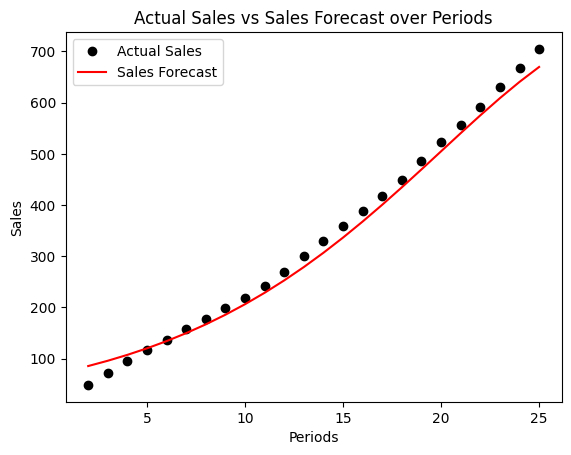

In [116]:
# Visualize the predicted sales
bass_model.plot_pdf()

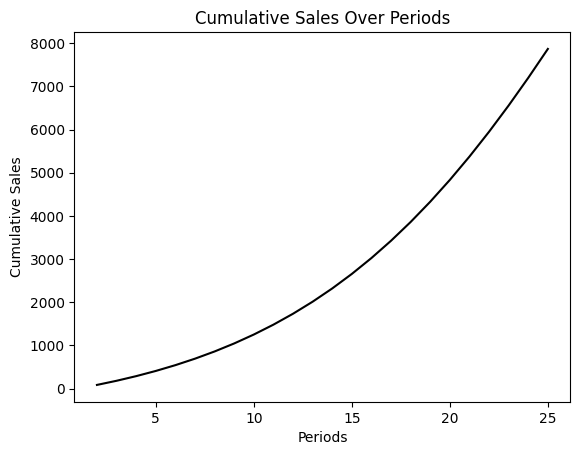

In [117]:
# Visualize the cumulative predicted sales
bass_model.plot_cdf()

In [108]:
# Display the summary
bass_model.summary()

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     3447.
Date:                Tue, 21 May 2024   Prob (F-statistic):           3.67e-27
Time:                        09:20:09   Log-Likelihood:                -91.248
No. Observations:                  24   AIC:                             188.5
Df Residuals:                      21   BIC:                             192.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            76.2615      4.79